# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [103]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

import time
from tqdm import tqdm
import os
import pickle

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [104]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [105]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [106]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [107]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
print(resource_data.head(2))

# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'quantity':'sum', 'price':'sum'}).reset_index()

# Join two data frames
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data.head(5)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']
        id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95  


Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   
2       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73           Mrs.   
3      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
4       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   
2           CA 2016-04-27 00:46:53          Grades PreK-2   
3           GA 2016-04-27 00:53:00          Grades PreK-2   
4           WA 2016-04-27 01:05:25             Grades 3-5   

  project_subject_categories            project_subject_subcategories  \
0             Math & Science  Applied Sciences, Health & Life Science   
1              Special Needs                            Special Needs   
2        Literacy & Language                                 Literacy   
3           Applied Learning                        Early Development   
4        Literacy & Language                                 Literacy   

                                    project_title  \
0    Engineering STEAM into the Primary Classroom   
1                         Sensory Tools for Focus   
2  Mobile Learning with a Mobile Listening Center   
3          Flexible Seating for Flexible Learning   
4          Going Deep: The Art of Inner Thinking!   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   
2  Having a class of 24 students comes with diver...   
3  I recently read an article about giving studen...   
4  My students crave challenge, they eat obstacle...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   
2  I have a class of twenty-four kindergarten stu...   
3  I teach at a low-income (Title 1) school. Ever...   
4  We are an urban, public k-5 elementary school....   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   
2  By having a mobile listening and storage cente...   
3  We need a classroom rug that we can use as a c...   
4  With the new common core standards that have b...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   
2  A mobile listening center will help keep equip...   
3  Benjamin Franklin once said, \"Tell me and I f...   
4  These remarkable gifts will provide students w...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   
2  My students need a mobile listening center to ...   
3  My students need flexible seating in the class...   
4  My students need copies of the New York Times ...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   
2                                            10                    1   
3                                             2                    1   
4                                             2                    1   

   quantity   price  
0         4  725.05  
1         8  213.03  
2         1  329.00  
3         9  481.04  
4        14   17.74

## 1.2 preprocessing of `project_subject_categories`

In [108]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [109]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [110]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [111]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

   quantity   price clean_categories                 clean_subcategories  \
0         4  725.05     Math_Science  AppliedSciences Health_LifeScience   
1         8  213.03     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  I have been fortunate enough to use the Fairy ...  
1  Imagine being 8-9 years old. You're in your th...

In [112]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [113]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [114]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [115]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [116]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [117]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [118]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [119]:
# Create function that will filter sentance
def filterSentance(sentance):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = sent.lower()
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    return sent.strip()

In [120]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    preprocessed_essays.append(filterSentance(sentance))

100%|██████████| 109248/109248 [00:56<00:00, 1940.32it/s]


In [121]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [122]:
# similarly you can preprocess the titles also
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    preprocessed_titles.append(filterSentance(sentance))

100%|██████████| 109248/109248 [00:02<00:00, 36613.25it/s]


In [123]:
# after preprocessing
print(preprocessed_titles[20000])

health nutritional cooking kindergarten


In [124]:
# similarly you can preprocess the project_resource_summary also
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_resource_summary = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_resource_summary'].values):
    preprocessed_resource_summary.append(filterSentance(sentance))

100%|██████████| 109248/109248 [00:05<00:00, 20559.73it/s]


In [125]:
# after preprocessing
print(preprocessed_resource_summary[20000])

students need cooking supplies help us healthy learn nutrition mixer apple spiralizer kitchen tools nutrition kit kid friendly healthy literature ink make cookbooks


In [126]:
# Preprocess teacher_prefix
from tqdm import tqdm
preprocessed_teacher_prefix = []
# tqdm is for printing the status bar
for teacher_prefix in tqdm(project_data['teacher_prefix'].values):
    teacher_prefix = str(teacher_prefix)
    clean_teacher_prefix = decontracted(teacher_prefix)
    clean_teacher_prefix = clean_teacher_prefix.replace('\\r', ' ')
    clean_teacher_prefix = clean_teacher_prefix.replace('\\"', ' ')
    clean_teacher_prefix = clean_teacher_prefix.replace('\\n', ' ')
    clean_teacher_prefix = re.sub('[^A-Za-z0-9]+', ' ', clean_teacher_prefix)
    clean_teacher_prefix = clean_teacher_prefix.lower()
    if clean_teacher_prefix in stopwords:
        continue
    preprocessed_teacher_prefix.append(clean_teacher_prefix.strip())

100%|██████████| 109248/109248 [00:01<00:00, 83062.34it/s]


In [127]:
preprocessed_teacher_prefix[0:10]

['mrs', 'ms', 'mrs', 'mrs', 'mrs', 'mrs', 'mrs', 'ms', 'ms', 'mrs']

In [128]:
# Preprocess project_grade_category
from tqdm import tqdm
preprocessed_project_grade_category = []
# tqdm is for printing the status bar
for project_grade_category in tqdm(project_data['project_grade_category'].values):
    project_grade_category = str(project_grade_category)
    clean_project_grade_category = decontracted(project_grade_category)
    clean_project_grade_category = clean_project_grade_category.replace('\\r', ' ')
    clean_project_grade_category = clean_project_grade_category.replace('\\"', ' ')
    clean_project_grade_category = clean_project_grade_category.replace('\\n', ' ')
    clean_project_grade_category = re.sub('[^A-Za-z0-9]+', ' ', clean_project_grade_category)
    clean_project_grade_category = clean_project_grade_category.lower()
    if clean_project_grade_category in stopwords:
        continue
    clean_project_grade_category = clean_project_grade_category.strip()
#     whitespace are creating problems because we are treating this as categorical feature    
    preprocessed_project_grade_category.append(clean_project_grade_category.replace(' ', '_'))

100%|██████████| 109248/109248 [00:01<00:00, 81320.94it/s]


In [129]:
preprocessed_project_grade_category[0:10]

['grades_prek_2',
 'grades_3_5',
 'grades_prek_2',
 'grades_prek_2',
 'grades_3_5',
 'grades_3_5',
 'grades_3_5',
 'grades_3_5',
 'grades_prek_2',
 'grades_3_5']

In [130]:
# Replace original columns with preprocessed column values
project_data['clean_essays'] = preprocessed_essays
project_data['clean_titles'] = preprocessed_titles
project_data['project_resource_summary'] = preprocessed_resource_summary
project_data['teacher_prefix'] = preprocessed_teacher_prefix
project_data['project_grade_category'] = preprocessed_project_grade_category
# Drop essays column
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

In [131]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5            mrs   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df             ms   
2       74477  p189804  4a97f3a390bfe21b99cf5e2b81981c73            mrs   
3      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3            mrs   
4       33679  p137682  06f6e62e17de34fcf81020c77549e1d5            mrs   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          grades_prek_2   
1           UT 2016-04-27 00:31:25             grades_3_5   
2           CA 2016-04-27 00:46:53          grades_prek_2   
3           GA 2016-04-27 00:53:00          grades_prek_2   
4           WA 2016-04-27 01:05:25             grades_3_5   

                                    project_title  \
0    Engineering STEAM into the Primary Classroom   
1                         Sensory Tools for Focus   
2  Mobile Learning with a Mobile Listening Center   
3          Flexible Seating for Flexible Learning   
4          Going Deep: The Art of Inner Thinking!   

                            project_resource_summary  \
0  students need stem kits learn critical science...   
1  students need boogie boards quiet sensory brea...   
2  students need mobile listening center able enh...   
3  students need flexible seating classroom choos...   
4  students need copies new york times best selle...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   
2                                            10                    1   
3                                             2                    1   
4                                             2                    1   

   quantity   price   clean_categories                 clean_subcategories  \
0         4  725.05       Math_Science  AppliedSciences Health_LifeScience   
1         8  213.03       SpecialNeeds                        SpecialNeeds   
2         1  329.00  Literacy_Language                            Literacy   
3         9  481.04    AppliedLearning                    EarlyDevelopment   
4        14   17.74  Literacy_Language                            Literacy   

                                               essay  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   
2  Having a class of 24 students comes with diver...   
3  I recently read an article about giving studen...   
4  My students crave challenge, they eat obstacle...   

                                        clean_essays  \
0  fortunate enough use fairy tale stem kits clas...   
1  imagine 8 9 years old third grade classroom se...   
2  class 24 students comes diverse learners stude...   
3  recently read article giving students choice l...   
4  students crave challenge eat obstacles breakfa...   

                              clean_titles  
0      engineering steam primary classroom  
1                      sensory tools focus  
2  mobile learning mobile listening center  
3       flexible seating flexible learning  
4            going deep art inner thinking

In [132]:
project_data.tail(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
109243       45036  p194916  29cf137e5a40b0f141d9fd7898303a5c            mrs   
109244       12610  p162971  22fee80f2078c694c2d244d3ecb1c390             ms   
109245      179833  p096829  c8c81a73e29ae3bdd4140be8ad0bea00            mrs   
109246       13791  p184393  65545a295267ad9df99f26f25c978fd0            mrs   
109247      124250  p028318  1fff5a88945be8b2c728c6a85c31930f            mrs   

       school_state                Date project_grade_category  \
109243           HI 2017-04-30 23:11:45            grades_9_12   
109244           NM 2017-04-30 23:23:24          grades_prek_2   
109245           IL 2017-04-30 23:25:42             grades_3_5   
109246           HI 2017-04-30 23:27:07            grades_9_12   
109247           CA 2017-04-30 23:45:08          grades_prek_2   

                                            project_title  \
109243                Nanakuli Football Projection Screen   
109244                            Operation  Organization   
109245  Bringing Agriculture and Sustainability to the...   
109246                     Cricket Cutting Machine Needed   
109247                                      News for Kids   

                                 project_resource_summary  \
109243  students need projection screen use team meetings   
109244  students need organization supplies order clea...   
109245  students need 5 windows laptops students acces...   
109246  students need cricket machine help make displa...   
109247  students need subscription scholastic news mag...   

        teacher_number_of_previously_posted_projects  project_is_approved  \
109243                                             5                    1   
109244                                             3                    1   
109245                                             0                    1   
109246                                             1                    1   
109247                                             2                    1   

        quantity   price   clean_categories  \
109243         2  143.36      Health_Sports   
109244        10  268.57    AppliedLearning   
109245         5  399.00       Math_Science   
109246         4  287.73       Math_Science   
109247        25    5.50  Literacy_Language   

                         clean_subcategories  \
109243                            TeamSports   
109244                EarlyDevelopment Other   
109245  AppliedSciences EnvironmentalScience   
109246                    Health_LifeScience   
109247           Literacy Literature_Writing   

                                                    essay  \
109243  Our day starts with about 100 students athlete...   
109244  My students range from age four to five years ...   
109245  We are a Title 1 school  650 total students. O...   
109246  I teach many different types of students.  My ...   
109247  My first graders are eager to learn about the ...   

                                             clean_essays  \
109243  day starts 100 students athletes low income ba...   
109244  students range age four five years old attend ...   
109245  title 1 school 650 total students elementary s...   
109246  teach many different types students classes fu...   
109247  first graders eager learn world around come sc...   

                                             clean_titles  
109243                nanakuli football projection screen  
109244                             operation organization  
109245  bringing agriculture sustainability classroom ...  
109246                     cricket cutting machine needed  
109247                                          news kids

In [133]:
print(set(preprocessed_project_grade_category))

{'grades_3_5', 'grades_prek_2', 'grades_6_8', 'grades_9_12'}


In [134]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('null')

In [135]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5            mrs   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df             ms   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          grades_prek_2   
1           UT 2016-04-27 00:31:25             grades_3_5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                            project_resource_summary  \
0  students need stem kits learn critical science...   
1  students need boogie boards quiet sensory brea...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

   quantity   price clean_categories                 clean_subcategories  \
0         4  725.05     Math_Science  AppliedSciences Health_LifeScience   
1         8  213.03     SpecialNeeds                        SpecialNeeds   

                                               essay  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                        clean_essays  \
0  fortunate enough use fairy tale stem kits clas...   
1  imagine 8 9 years old third grade classroom se...   

                          clean_titles  
0  engineering steam primary classroom  
1                  sensory tools focus

## 1.5 Preparing data for models

In [136]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'quantity', 'price', 'clean_categories', 'clean_subcategories', 'essay',
       'clean_essays', 'clean_titles'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [137]:
print(project_data.shape)

# I am taking 100% of data points for my analysis
project_data = project_data.sample(frac=1)

print(project_data.shape)

(109248, 18)
(109248, 18)


In [138]:
# Splitting data
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
X = project_data
project_data.shape

(109248, 17)

In [139]:
# Split Train, CV and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

print('Train Data Set', X_train.shape, y_train.shape)
print('Cross Validate Data Set', X_cv.shape, y_cv.shape)
print('Test Data Set', X_test.shape, y_test.shape)

Train Data Set (49041, 17) (49041,)
Cross Validate Data Set (24155, 17) (24155,)
Test Data Set (36052, 17) (36052,)


In [140]:
# Commented code as per your suggestion
# # Handle imblanced data set
# from imblearn.over_sampling import RandomOverSampler
# from collections import Counter

# ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)
# print('Resampled Dataset Shape %s ' %Counter(y_train))

# X_train = pd.DataFrame(X_train, columns=X.columns)
# X_train.head(2)

In [141]:
print('Train Data Set', X_train.shape, y_train.shape)
print('Cross Validate Data Set', X_cv.shape, y_cv.shape)
print('Test Data Set', X_test.shape, y_test.shape)
print('*'*100)

Train Data Set (49041, 17) (49041,)
Cross Validate Data Set (24155, 17) (24155,)
Test Data Set (36052, 17) (36052,)
****************************************************************************************************


### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [142]:
# One hot encoding of Categorical Feature
# - school_state : categorical data
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)# Fit has to happen only on train data

X_train_school_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_school_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_school_state_ohe = vectorizer.transform(X_test['school_state'].values)

school_state_features = vectorizer.get_feature_names()

print(X_train_school_state_ohe.shape, y_train.shape)
print(X_cv_school_state_ohe.shape, y_cv.shape)
print(X_test_school_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print('*'*100)

(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
****************************************************************************************************


In [143]:
# One hot encoding of Categorical Feature
# - clean_categories : categorical data
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)# Fit has to happen only on train data

X_train_clean_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

clean_categories_features = vectorizer.get_feature_names()

print(X_train_clean_categories_ohe.shape, y_train.shape)
print(X_cv_clean_categories_ohe.shape, y_cv.shape)
print(X_test_clean_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print('*'*100)

(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
****************************************************************************************************


In [144]:
# One hot encoding of Categorical Feature
# - clean_subcategories : categorical data
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)# Fit has to happen only on train data

X_train_clean_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

clean_subcategories_features = vectorizer.get_feature_names()

print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_cv_clean_subcategories_ohe.shape, y_cv.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print('*'*100)

(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
****************************************************************************************************


In [145]:
print(X_train['project_grade_category'])
# One hot encoding of Categorical Feature
# - project_grade_category : categorical data
# Convert one hot encoding for project grade category
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)# Fit has to happen only on train data

X_train_project_grade_category_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_project_grade_category_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_project_grade_category_ohe = vectorizer.transform(X_test['project_grade_category'].values)

project_grade_category_features = vectorizer.get_feature_names()

print(X_train_project_grade_category_ohe.shape, y_train.shape)
print(X_cv_project_grade_category_ohe.shape, y_cv.shape)
print(X_test_project_grade_category_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print('*'*100)

74657     grades_prek_2
46445        grades_6_8
73937       grades_9_12
19663       grades_9_12
19450     grades_prek_2
4297      grades_prek_2
56194        grades_6_8
41135     grades_prek_2
10082     grades_prek_2
45539        grades_3_5
105852       grades_3_5
53343     grades_prek_2
28322     grades_prek_2
53781        grades_3_5
15710        grades_3_5
56558     grades_prek_2
30472        grades_3_5
106717       grades_3_5
99527        grades_3_5
62392        grades_3_5
40877     grades_prek_2
52082        grades_3_5
80008     grades_prek_2
62168     grades_prek_2
78813     grades_prek_2
39710        grades_6_8
4181      grades_prek_2
76169        grades_3_5
23059     grades_prek_2
21656     grades_prek_2
              ...      
29539     grades_prek_2
4878         grades_3_5
64470        grades_3_5
103162       grades_6_8
25085     grades_prek_2
14998     grades_prek_2
106699       grades_3_5
57677     grades_prek_2
66270     grades_prek_2
88707       grades_9_12
8551         gra

In [146]:
print(X_train_project_grade_category_ohe.toarray())

[[0 0 0 1]
 [0 1 0 0]
 [0 0 1 0]
 ...
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]]


In [147]:
# One hot encoding of Categorical Feature
# - teacher_prefix : categorical data
print(X_train['teacher_prefix'])
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)# Fit has to happen only on train data

X_train_teacher_prefix_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_clean_teacher_prefix_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_clean_teacher_prefix_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

teacher_prefix_features = vectorizer.get_feature_names()

print(X_train_teacher_prefix_ohe.shape, y_train.shape)
print(X_cv_clean_teacher_prefix_ohe.shape, y_cv.shape)
print(X_test_clean_teacher_prefix_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print('*'*100)

74657         mrs
46445          ms
73937          ms
19663         mrs
19450         mrs
4297           ms
56194          mr
41135         mrs
10082         mrs
45539         mrs
105852         mr
53343          ms
28322         mrs
53781          ms
15710          ms
56558         mrs
30472          ms
106717        mrs
99527          ms
62392         mrs
40877         mrs
52082         mrs
80008         mrs
62168          ms
78813         mrs
39710          ms
4181           ms
76169          ms
23059         mrs
21656     teacher
           ...   
29539         mrs
4878          mrs
64470         mrs
103162         ms
25085         mrs
14998          ms
106699        mrs
57677          ms
66270         mrs
88707          mr
8551           ms
97604         mrs
32271          ms
65708         mrs
78587         mrs
79981         mrs
27745         mrs
370           mrs
79772          ms
39033          mr
42122         mrs
39551         mrs
71793          ms
84579          ms
81071     

In [148]:
print(X_train_teacher_prefix_ohe.toarray())

[[0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 ...
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]]


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [149]:
# # Sample code for bigram extraction using TFIDF
# from sklearn.feature_extraction.text import TfidfVectorizer
# corpus = [
#     'This is the first document.',
#     'This document is the second document.',
#     'And this is the third one.',
#     'Is this the first document?',
# ]
# vectorizer = TfidfVectorizer(ngram_range=(2,2))
# X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names())

# print(X.shape)

In [150]:
# - project_title : text data
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("*"*100)

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['clean_titles'].values)
X_cv_title_bow = vectorizer.transform(X_cv['clean_titles'].values)
X_test_title_bow = vectorizer.transform(X_test['clean_titles'].values)

clean_titles_bow_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
# print(vectorizer.get_feature_names())
print("*"*100)

(49041, 17) (49041,)
(24155, 17) (24155,)
(36052, 17) (36052,)
****************************************************************************************************
After vectorizations
(49041, 3418) (49041,)
(24155, 3418) (24155,)
(36052, 3418) (36052,)
****************************************************************************************************


In [151]:
# - text : text data
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("*"*100)

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['clean_essays'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['clean_essays'].values)
X_test_essay_bow = vectorizer.transform(X_test['clean_essays'].values)

easy_bow_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
# print(vectorizer.get_feature_names())
print("*"*100)

(49041, 17) (49041,)
(24155, 17) (24155,)
(36052, 17) (36052,)
****************************************************************************************************
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)
****************************************************************************************************


In [152]:
# - project_resource_summary: text data (optinal)
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("*"*100)

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['project_resource_summary'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_resource_summary_bow = vectorizer.transform(X_train['project_resource_summary'].values)
X_cv_project_resource_summary_bow = vectorizer.transform(X_cv['project_resource_summary'].values)
X_test_project_resource_summary_bow = vectorizer.transform(X_test['project_resource_summary'].values)

project_resource_summary_bow_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_project_resource_summary_bow.shape, y_train.shape)
print(X_cv_project_resource_summary_bow.shape, y_cv.shape)
print(X_test_project_resource_summary_bow.shape, y_test.shape)
# print(vectorizer.get_feature_names())
print("*"*100)

(49041, 17) (49041,)
(24155, 17) (24155,)
(36052, 17) (36052,)
****************************************************************************************************
After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)
****************************************************************************************************


#### 1.5.2.2 TFIDF vectorizer

In [153]:
# - project_title : text data
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("*"*100)

from sklearn.feature_extraction.text import TfidfVectorizer
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['clean_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer.transform(X_train['clean_titles'].values)
X_cv_title_tfidf = vectorizer.transform(X_cv['clean_titles'].values)
X_test_title_tfidf = vectorizer.transform(X_test['clean_titles'].values)

clean_titles_tfidf_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_cv_title_tfidf.shape, y_test.shape)
print("*"*100)

(49041, 17) (49041,)
(24155, 17) (24155,)
(36052, 17) (36052,)
****************************************************************************************************
After vectorizations
(49041, 1996) (49041,)
(24155, 1996) (24155,)
(24155, 1996) (36052,)
****************************************************************************************************


In [154]:
# - text : text data
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("*"*100)

from sklearn.feature_extraction.text import TfidfVectorizer
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = TfidfVectorizer(min_df=10)#, ngram_range=(2,2), max_features=5000
vectorizer.fit(X_train['clean_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['clean_essays'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['clean_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['clean_essays'].values)

easy_tfidf_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("*"*100)

(49041, 17) (49041,)
(24155, 17) (24155,)
(36052, 17) (36052,)
****************************************************************************************************
After vectorizations
(49041, 12036) (49041,)
(24155, 12036) (24155,)
(36052, 12036) (36052,)
****************************************************************************************************


In [155]:
# - project_resource_summary: text data (optinal)
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("*"*100)

from sklearn.feature_extraction.text import TfidfVectorizer
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['project_resource_summary'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_resource_summary_tfidf = vectorizer.transform(X_train['project_resource_summary'].values)
X_cv_project_resource_summary_tfidf = vectorizer.transform(X_cv['project_resource_summary'].values)
X_test_project_resource_summary_tfidf = vectorizer.transform(X_test['project_resource_summary'].values)

project_resource_summary_tfidf_features = vectorizer.get_feature_names()

print("After vectorizations")
print(X_train_project_resource_summary_tfidf.shape, y_train.shape)
print(X_cv_project_resource_summary_tfidf.shape, y_cv.shape)
print(X_test_project_resource_summary_tfidf.shape, y_test.shape)
print("*"*100)

(49041, 17) (49041,)
(24155, 17) (24155,)
(36052, 17) (36052,)
****************************************************************************************************
After vectorizations
(49041, 3854) (49041,)
(24155, 3854) (24155,)
(36052, 3854) (36052,)
****************************************************************************************************


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [156]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [157]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [158]:
# average Word2Vec for train text
# compute average word2vec for each review.
avg_w2v_vectors_text_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_text_train.append(vector)

print(len(avg_w2v_vectors_text_train))
print(len(avg_w2v_vectors_text_train[0]))

100%|██████████| 49041/49041 [00:11<00:00, 4109.10it/s]

49041
300


In [159]:
# average Word2Vec for CV text
# compute average word2vec for each review.
avg_w2v_vectors_text_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_text_cv.append(vector)

print(len(avg_w2v_vectors_text_cv))
print(len(avg_w2v_vectors_text_cv[0]))

100%|██████████| 24155/24155 [00:06<00:00, 3855.15it/s]

24155
300


In [160]:
# average Word2Vec for test text
# compute average word2vec for each review.
avg_w2v_vectors_text_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essays'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_text_test.append(vector)

print(len(avg_w2v_vectors_text_test))
print(len(avg_w2v_vectors_text_test[0]))

100%|██████████| 36052/36052 [00:09<00:00, 3963.99it/s]

36052
300


In [161]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_train.append(vector)

print(len(avg_w2v_vectors_title_train))
print(len(avg_w2v_vectors_title_train[0]))

100%|██████████| 49041/49041 [00:00<00:00, 87129.20it/s]

49041
300


In [162]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_cv.append(vector)

print(len(avg_w2v_vectors_title_cv))
print(len(avg_w2v_vectors_title_cv[0]))

100%|██████████| 24155/24155 [00:00<00:00, 86474.85it/s]

24155
300


In [163]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title_test.append(vector)

print(len(avg_w2v_vectors_title_test))
print(len(avg_w2v_vectors_title_test[0]))

100%|██████████| 36052/36052 [00:00<00:00, 87711.81it/s]

36052
300


In [164]:
# Similarly you can vectorize for project_resource_summary also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_project_resource_summary_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_resource_summary']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_resource_summary_train.append(vector)

print(len(avg_w2v_vectors_project_resource_summary_train))
print(len(avg_w2v_vectors_project_resource_summary_train[0]))

100%|██████████| 49041/49041 [00:01<00:00, 39726.65it/s]

49041
300


In [165]:
# Similarly you can vectorize for project_resource_summary also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_project_resource_summary_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_resource_summary']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_resource_summary_cv.append(vector)

print(len(avg_w2v_vectors_project_resource_summary_cv))
print(len(avg_w2v_vectors_project_resource_summary_cv[0]))

100%|██████████| 24155/24155 [00:00<00:00, 39537.82it/s]

24155
300


In [166]:
# Similarly you can vectorize for project_resource_summary also
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_project_resource_summary_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_resource_summary']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_resource_summary_test.append(vector)

print(len(avg_w2v_vectors_project_resource_summary_test))
print(len(avg_w2v_vectors_project_resource_summary_test[0]))

100%|██████████| 36052/36052 [00:01<00:00, 30623.75it/s]

36052
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [167]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [168]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_text_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_text_train.append(vector)

print(len(tfidf_w2v_vectors_text_train))
print(len(tfidf_w2v_vectors_text_train[0]))

100%|██████████| 49041/49041 [01:46<00:00, 460.31it/s]

49041
300


In [169]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_text_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_text_cv.append(vector)

print(len(tfidf_w2v_vectors_text_cv))
print(len(tfidf_w2v_vectors_text_cv[0]))

100%|██████████| 24155/24155 [00:50<00:00, 479.28it/s]

24155
300


In [170]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_text_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_text_test.append(vector)

print(len(tfidf_w2v_vectors_text_test))
print(len(tfidf_w2v_vectors_text_test[0]))

100%|██████████| 36052/36052 [01:14<00:00, 482.25it/s]

36052
300


In [171]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [172]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)

print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))

100%|██████████| 49041/49041 [00:01<00:00, 26915.61it/s]

49041
300


In [173]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_cv.append(vector)

print(len(tfidf_w2v_vectors_title_cv))
print(len(tfidf_w2v_vectors_title_cv[0]))

100%|██████████| 24155/24155 [00:00<00:00, 30066.45it/s]

24155
300


In [174]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)

print(len(tfidf_w2v_vectors_title_test))
print(len(tfidf_w2v_vectors_title_test[0]))

100%|██████████| 36052/36052 [00:01<00:00, 32306.80it/s]

36052
300


In [175]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_resource_summary'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [176]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_project_resource_summary_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_resource_summary']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_resource_summary_train.append(vector)

print(len(tfidf_w2v_vectors_project_resource_summary_train))
print(len(tfidf_w2v_vectors_project_resource_summary_train[0]))

100%|██████████| 49041/49041 [00:05<00:00, 9170.30it/s] 

49041
300


In [177]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_project_resource_summary_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_resource_summary']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_resource_summary_cv.append(vector)

print(len(tfidf_w2v_vectors_project_resource_summary_cv))
print(len(tfidf_w2v_vectors_project_resource_summary_cv[0]))

100%|██████████| 24155/24155 [00:02<00:00, 8335.50it/s]

24155
300


In [178]:
# Similarly you can vectorize for title also
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_project_resource_summary_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_resource_summary']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_resource_summary_test.append(vector)

print(len(tfidf_w2v_vectors_project_resource_summary_test))
print(len(tfidf_w2v_vectors_project_resource_summary_test[0]))

100%|██████████| 36052/36052 [00:04<00:00, 7844.75it/s] 

36052
300


### 1.5.3 Vectorizing Numerical features

In [179]:
# You no need to perform standardization/normalization on numerical data, 
# because you will classify data by using gini impurity in decision tree classifier.
# - quantity : numerical (optional)

X_train_quantity_norm = X_train['quantity'].values.reshape(-1,1)
X_cv_quantity_norm = X_cv['quantity'].values.reshape(-1,1)
X_test_quantity_norm = X_test['quantity'].values.reshape(-1,1)

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_cv_quantity_norm.shape, y_cv.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [180]:
# You no need to perform standardization/normalization on numerical data, 
# because you will classify data by using gini impurity in decision tree classifier.
# One hot encoding of numerical feature
# - teacher_number_of_previously_posted_projects : numerical
X_train_teacher_number_of_previously_posted_projects_norm = X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
X_cv_teacher_number_of_previously_posted_projects_norm = X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
X_test_teacher_number_of_previously_posted_projects_norm = X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print(X_cv_teacher_number_of_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [181]:
# You no need to perform standardization/normalization on numerical data, 
# because you will classify data by using gini impurity in decision tree classifier.
# - price : numerical

X_train_price_norm = X_train['price'].values.reshape(-1,1)
X_cv_price_norm = X_cv['price'].values.reshape(-1,1)
X_test_price_norm = X_test['price'].values.reshape(-1,1)

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [182]:
# print(categories_one_hot.shape)
# print(sub_categories_one_hot.shape)
# print(text_bow.shape)
# print(price_standardized.shape)
print('Categorical Features')
print('*'*100)
print(X_train_school_state_ohe.shape, y_train.shape)
print(X_cv_school_state_ohe.shape, y_cv.shape)
print(X_test_school_state_ohe.shape, y_test.shape)
print('*'*100)
print(X_train_clean_categories_ohe.shape, y_train.shape)
print(X_cv_clean_categories_ohe.shape, y_cv.shape)
print(X_test_clean_categories_ohe.shape, y_test.shape)
print('*'*100)
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_cv_clean_subcategories_ohe.shape, y_cv.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print('*'*100)
print(X_train_project_grade_category_ohe.shape, y_train.shape)
print(X_cv_project_grade_category_ohe.shape, y_cv.shape)
print(X_test_project_grade_category_ohe.shape, y_test.shape)
print('*'*100)
print(X_train_teacher_prefix_ohe.shape, y_train.shape)
print(X_cv_clean_teacher_prefix_ohe.shape, y_cv.shape)
print(X_test_clean_teacher_prefix_ohe.shape, y_test.shape)
print('*'*100)
print('Text Encoding Features')
print('*'*100)
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
print('*'*100)
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print('*'*100)
print(X_train_project_resource_summary_bow.shape, y_train.shape)
print(X_cv_project_resource_summary_bow.shape, y_cv.shape)
print(X_test_project_resource_summary_bow.shape, y_test.shape)
print('*'*100)
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_cv_title_tfidf.shape, y_test.shape)
print('*'*100)
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print('*'*100)
print(X_train_project_resource_summary_tfidf.shape, y_train.shape)
print(X_cv_project_resource_summary_tfidf.shape, y_cv.shape)
print(X_test_project_resource_summary_tfidf.shape, y_test.shape)
print('*'*100)
print(len(avg_w2v_vectors_text_train))
print(len(avg_w2v_vectors_text_train[0]))
print('*'*100)
print(len(avg_w2v_vectors_text_cv))
print(len(avg_w2v_vectors_text_cv[0]))
print('*'*100)
print(len(avg_w2v_vectors_text_test))
print(len(avg_w2v_vectors_text_test[0]))
print('*'*100)
print(len(avg_w2v_vectors_title_train))
print(len(avg_w2v_vectors_title_train[0]))
print('*'*100)
print(len(avg_w2v_vectors_title_cv))
print(len(avg_w2v_vectors_title_cv[0]))
print('*'*100)
print(len(avg_w2v_vectors_title_test))
print(len(avg_w2v_vectors_title_test[0]))
print('*'*100)
print(len(avg_w2v_vectors_project_resource_summary_train))
print(len(avg_w2v_vectors_project_resource_summary_train[0]))
print('*'*100)
print(len(avg_w2v_vectors_project_resource_summary_cv))
print(len(avg_w2v_vectors_project_resource_summary_cv[0]))
print('*'*100)
print(len(avg_w2v_vectors_project_resource_summary_test))
print(len(avg_w2v_vectors_project_resource_summary_test[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_text_train))
print(len(tfidf_w2v_vectors_text_train[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_text_cv))
print(len(tfidf_w2v_vectors_text_cv[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_text_test))
print(len(tfidf_w2v_vectors_text_test[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_title_cv))
print(len(tfidf_w2v_vectors_title_cv[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_title_test))
print(len(tfidf_w2v_vectors_title_test[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_project_resource_summary_train))
print(len(tfidf_w2v_vectors_project_resource_summary_train[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_project_resource_summary_cv))
print(len(tfidf_w2v_vectors_project_resource_summary_cv[0]))
print('*'*100)
print(len(tfidf_w2v_vectors_project_resource_summary_test))
print(len(tfidf_w2v_vectors_project_resource_summary_test[0]))
print('*'*100)
print('Numerical Features')
print('*'*100)
print(X_train_quantity_norm.shape, y_train.shape)
print(X_cv_quantity_norm.shape, y_cv.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print('*'*100)
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print(X_cv_teacher_number_of_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)
print('*'*100)
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)

Categorical Features
****************************************************************************************************
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
****************************************************************************************************
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
****************************************************************************************************
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
****************************************************************************************************
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
****************************************************************************************************
(49041, 6) (49041,)
(24155, 6) (24155,)
(36052, 6) (36052,)
****************************************************************************************************
Text Encoding Features
********************************************

In [183]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
# X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
# X.shape

X_train_real = X_train
X_cv_real = X_cv
X_test_real = X_test

X_train = hstack((X_train_school_state_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_project_grade_category_ohe, X_train_teacher_prefix_ohe, X_train_title_bow, X_train_essay_bow, X_train_project_resource_summary_bow, X_train_title_tfidf, X_train_essay_tfidf, X_train_project_resource_summary_tfidf, avg_w2v_vectors_text_train, avg_w2v_vectors_title_train, avg_w2v_vectors_project_resource_summary_train, tfidf_w2v_vectors_text_train, tfidf_w2v_vectors_title_train, tfidf_w2v_vectors_project_resource_summary_train, X_train_quantity_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_price_norm)).tocsr()
X_cv = hstack((X_cv_school_state_ohe, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_project_grade_category_ohe, X_cv_clean_teacher_prefix_ohe, X_cv_title_bow, X_cv_essay_bow, X_cv_project_resource_summary_bow, X_cv_title_tfidf, X_cv_essay_tfidf, X_cv_project_resource_summary_tfidf, avg_w2v_vectors_text_cv, avg_w2v_vectors_title_cv, avg_w2v_vectors_project_resource_summary_cv, tfidf_w2v_vectors_text_cv, tfidf_w2v_vectors_title_cv, tfidf_w2v_vectors_project_resource_summary_cv, X_cv_quantity_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_price_norm)).tocsr()
X_test = hstack((X_test_school_state_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_project_grade_category_ohe, X_test_clean_teacher_prefix_ohe,X_test_title_bow, X_test_essay_bow, X_test_project_resource_summary_bow, X_test_title_tfidf, X_test_essay_tfidf, X_test_project_resource_summary_tfidf, avg_w2v_vectors_text_test, avg_w2v_vectors_title_test, avg_w2v_vectors_project_resource_summary_test, tfidf_w2v_vectors_text_test, tfidf_w2v_vectors_title_test, tfidf_w2v_vectors_project_resource_summary_test, X_test_quantity_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()

print(X_train_real.shape)
print(X_cv_real.shape)
print(X_test_real.shape)
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(49041, 17)
(24155, 17)
(36052, 17)
(49041, 33207)
(24155, 33207)
(36052, 33207)


__ Computing Sentiment Scores__

In [184]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Decision Tree </h1>

<h3><font color='red'>Note: I already completed steps 2.1, 2.2 & 2.3 previously, So I didn't copy code in below cells.</font></h3>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [185]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [186]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [187]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [188]:
#function to get heatmap confusion matrix
def get_confusion_matrix(clf,X_te,y_test):
    y_pred = clf.predict(X_te)
    df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
    df_cm.columns = ['Predicted NO','Predicted YES']
    df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [189]:
# function to collect prediction

def collect_prediction(prob, threshould, fpr, tpr):
    predictions = []
    t = threshould[np.argmax(fpr*(1-tpr))]
    for i in prob:
        if(i>=t):
            predictions.append(1)
        else:
            predictions.append(0)  
    return predictions

In [190]:
# function to collect fpr
def collect_fpr(y_test, predictions):
    fpr = []
    for i in range(len(y_test)):
        if(y_test[i] == 0 and predictions[i]==1):
            fpr.append(i)
    return fpr

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

<ul>
    <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li> 
</ul>

In [91]:
%%time
# Please write all the code with proper documentation

# Prepare data for BOW
X_train_bow = hstack((X_train_school_state_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_project_grade_category_ohe, X_train_teacher_prefix_ohe, X_train_title_bow, X_train_essay_bow, X_train_project_resource_summary_bow, X_train_quantity_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_price_norm)).tocsr()
X_cv_bow = hstack((X_cv_school_state_ohe, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_project_grade_category_ohe, X_cv_clean_teacher_prefix_ohe, X_cv_title_bow, X_cv_essay_bow, X_cv_project_resource_summary_bow, X_cv_quantity_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_price_norm)).tocsr()
X_test_bow = hstack((X_test_school_state_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_project_grade_category_ohe, X_test_clean_teacher_prefix_ohe,X_test_title_bow, X_test_essay_bow, X_test_project_resource_summary_bow, X_test_quantity_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()

print(X_train_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_cv.shape)
print(X_test_bow.shape, y_test.shape)

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

dt = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split':[5, 10, 100, 500]}
clf=GridSearchCV(dt, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_bow, y_train)

(49041, 13523) (49041,)
(24155, 13523) (24155,)
(36052, 13523) (36052,)
CPU times: user 6.8 s, sys: 520 ms, total: 7.32 s
Wall time: 14min 34s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000],
                         'min_samples_split': [5, 10, 100, 500

In [92]:
# Print results
# clf.cv_results_

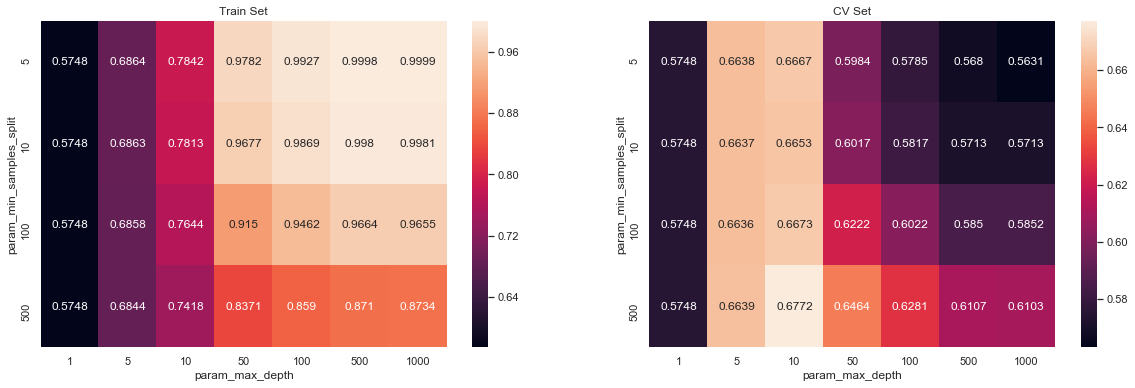

In [93]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [94]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_bow, y_train))
print(clf.score(X_test_bow, y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.7372286968456021
0.6813805833398057


In [95]:
max_depth = 10
min_samples_split = 500

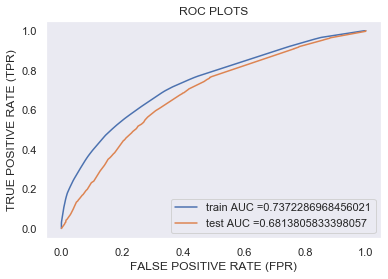

CPU times: user 6.17 s, sys: 178 ms, total: 6.35 s
Wall time: 10.5 s


In [96]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':[max_depth], 'min_samples_split':[min_samples_split]}
dt=GridSearchCV(DecisionTreeClassifier(class_weight='balanced', max_depth=max_depth, min_samples_split=min_samples_split), parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
dt.fit(X_train_bow, y_train);

y_train_pred = clf.predict_proba(X_train_bow)[:,1]  
y_test_pred = clf.predict_proba(X_test_bow)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

CPU times: user 405 ms, sys: 187 ms, total: 592 ms
Wall time: 506 ms


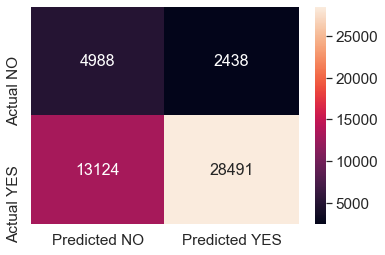

In [97]:
%%time
get_confusion_matrix(dt,X_train_bow,y_train)

CPU times: user 210 ms, sys: 21.6 ms, total: 232 ms
Wall time: 141 ms


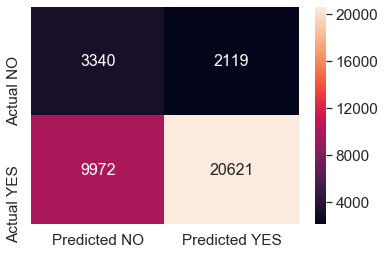

In [98]:
%%time
get_confusion_matrix(dt,X_test_bow,y_test)

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [99]:
# Collect all features name and create graph of features

features_bow = school_state_features + clean_categories_features + clean_subcategories_features + project_grade_category_features + teacher_prefix_features + clean_titles_bow_features + easy_bow_features + \
project_resource_summary_bow_features
features_bow.append('quantity')
features_bow.append('price')
features_bow.append('teacher_number_of_previously_posted_projects')

dt=DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_split=min_samples_split)
dt.fit(X_train_bow, y_train);

CPU times: user 144 ms, sys: 22.5 ms, total: 167 ms
Wall time: 976 ms


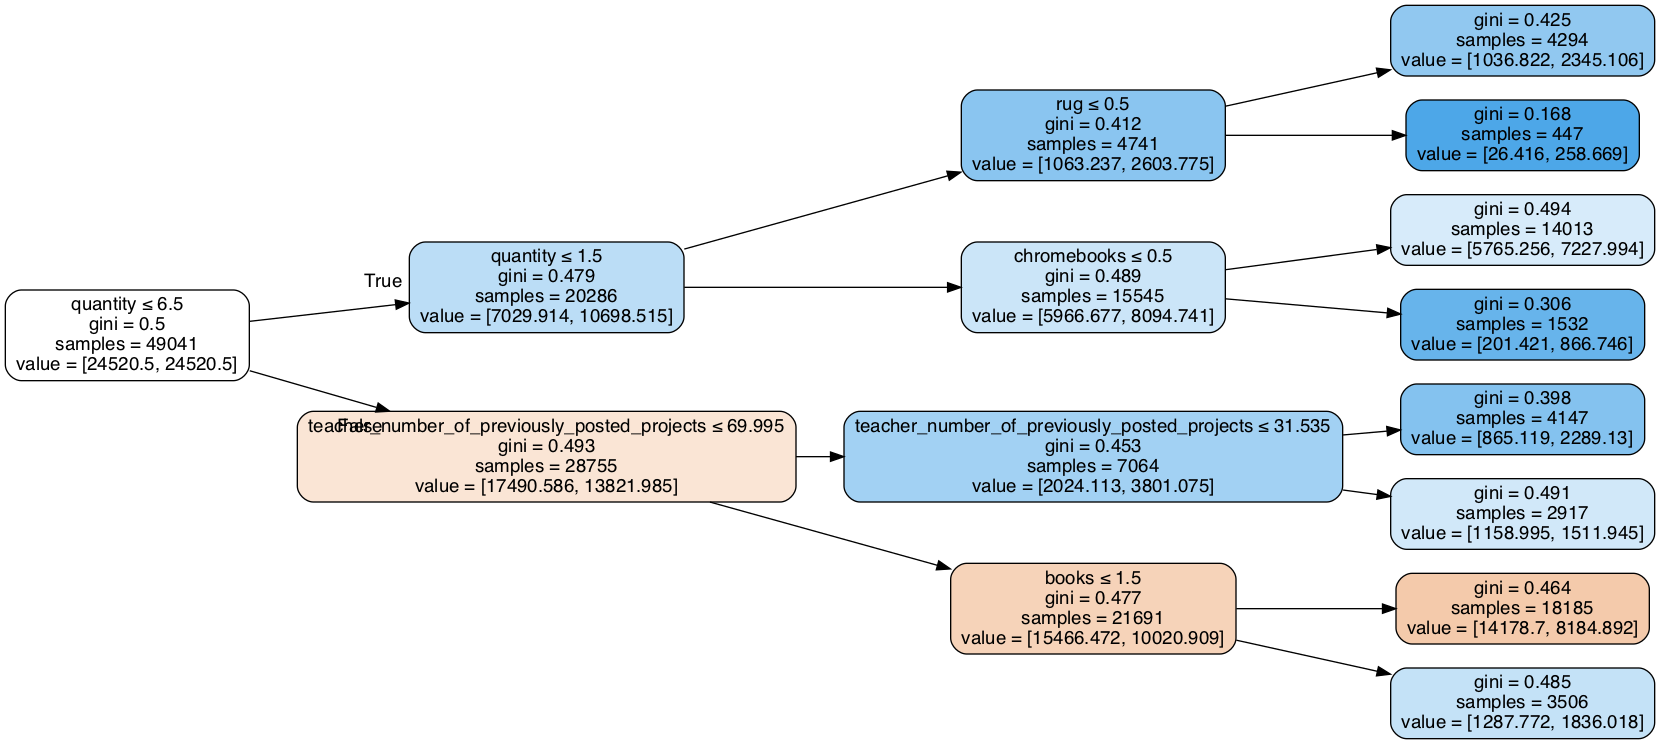

In [100]:
%%time
import warnings
warnings.filterwarnings("ignore")
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=features_bow, filled=True, rounded=True, special_characters=True, rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [195]:
# Collect false positive data

predictions = collect_prediction(y_test_pred, te_thresholds, test_fpr, test_tpr)

# train_fpr, train_tpr, tr_thresholds
fpr = collect_fpr(y_test, predictions)

essay = X_test_real['clean_essays'].to_frame()
essay = essay.reset_index()

price = X_test_real['price'].to_frame()
price = price.reset_index()

teacher_number_of_previously_posted_projects = X_test_real['teacher_number_of_previously_posted_projects'].to_frame()
teacher_number_of_previously_posted_projects = teacher_number_of_previously_posted_projects.reset_index()

flase_essays = []
false_price = []
false_teacher_number_of_previously_posted_projects = []
for i in fpr:
    flase_essays.append(essay.values[i][1:][0])
    false_price.append(price.values[i][1:][0])
    false_teacher_number_of_previously_posted_projects.append(teacher_number_of_previously_posted_projects.values[i][1:][0])
        
# print(len(flase_essays), len(false_price), len(false_teacher_number_of_previously_posted_projects))



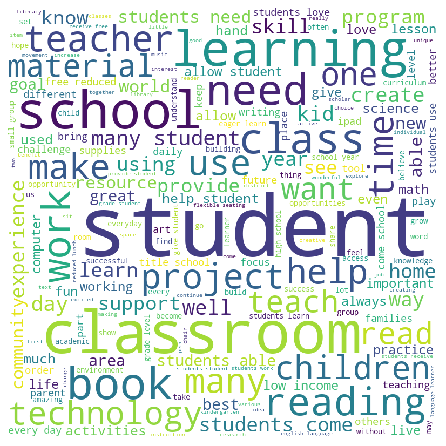

In [266]:
# create world cloud
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS)
for val in flase_essays:
    val = str(val)
    val = val.lower()
    tokens = val.split()
    for words in tokens:
        if(words == 'nan' or words == 'nannan'):
            continue
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

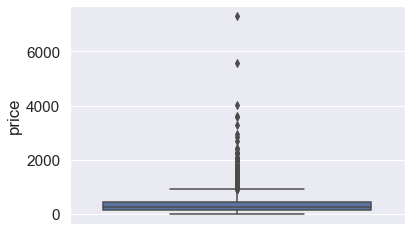

In [197]:
# Plot the box plot with the `price` of these `false positive data points`
df1 = pd.DataFrame({'price':false_price})
sns.boxplot(y='price', data=df1)

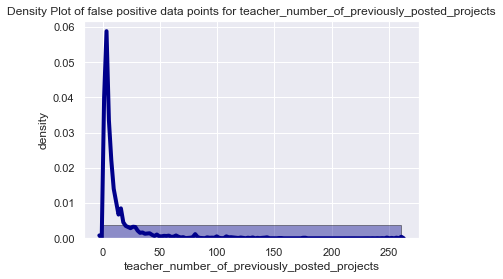

In [209]:
# Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
sns.distplot(false_teacher_number_of_previously_posted_projects, hist=True, kde=True, 
             bins=1, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title('Density Plot of false positive data points for teacher_number_of_previously_posted_projects') 
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('density')
plt.show()

# plt.figure(figsize=(8,5))
# counts, bin_edges = np.histogram(false_teacher_number_of_previously_posted_projects, bins='auto', density=True)
# pdf = counts/sum(counts)
# cdf = np.cumsum(pdf)

# pdfP, = plt.plot(bin_edges[1:], pdf)
# cdfP, = plt.plot(bin_edges[1:], cdf)
# plt.legend([pdfP, cdfP], ["PDF", "CDF"]) 
# plt.xlabel('teacher_number_of_previously_posted_projects')
# plt.show()

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

<ul>
    <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li> 
</ul>

In [210]:
%%time
# Please write all the code with proper documentation
# Prepare data for TFIDF
X_train_tfidf = hstack((X_train_school_state_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_project_grade_category_ohe, X_train_teacher_prefix_ohe, X_train_title_tfidf, X_train_essay_tfidf, X_train_project_resource_summary_tfidf, X_train_quantity_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_price_norm)).tocsr()
X_cv_tfidf = hstack((X_cv_school_state_ohe, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_project_grade_category_ohe, X_cv_clean_teacher_prefix_ohe, X_cv_title_tfidf, X_cv_essay_tfidf, X_cv_project_resource_summary_tfidf, X_cv_quantity_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_price_norm)).tocsr()
X_test_tfidf = hstack((X_test_school_state_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_project_grade_category_ohe, X_test_clean_teacher_prefix_ohe, X_test_title_tfidf, X_test_essay_tfidf, X_test_project_resource_summary_tfidf, X_test_quantity_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()

print(X_train_tfidf.shape)
print(X_cv_tfidf.shape)
print(X_test_tfidf.shape)


import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

dt = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split':[5, 10, 100, 500]}
clf=GridSearchCV(dt, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_tfidf, y_train)

(49041, 17989)
(24155, 17989)
(36052, 17989)
CPU times: user 9.72 s, sys: 513 ms, total: 10.2 s
Wall time: 17min 40s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000],
                         'min_samples_split': [5, 10, 100, 500

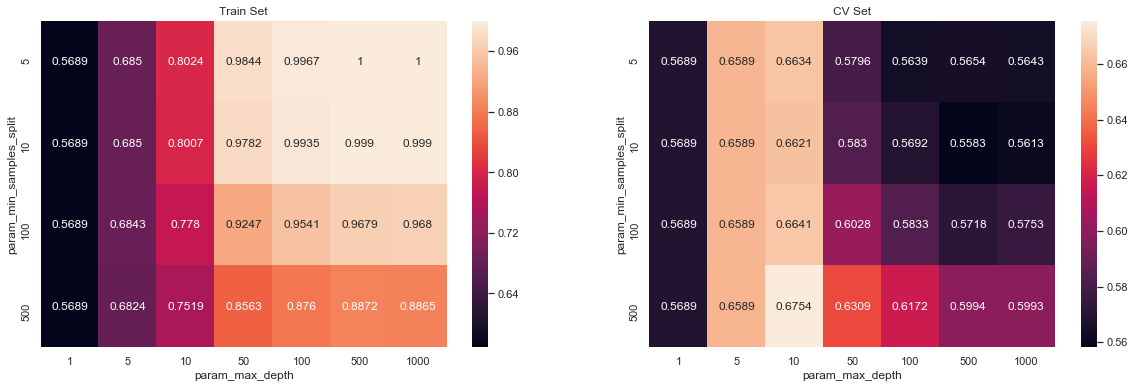

In [211]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [213]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_tfidf, y_train))
print(clf.score(X_test_tfidf, y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.745306991334485
0.6828680971675787


In [214]:
max_depth = 10
min_samples_split = 500

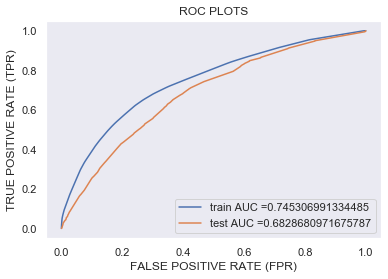

CPU times: user 9.51 s, sys: 167 ms, total: 9.68 s
Wall time: 17.9 s


In [215]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':[max_depth], 'min_samples_split':[min_samples_split]}
dt=GridSearchCV(DecisionTreeClassifier(class_weight='balanced', max_depth=max_depth, min_samples_split=min_samples_split), parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
dt.fit(X_train_tfidf, y_train);

y_train_pred = clf.predict_proba(X_train_tfidf)[:,1]  
y_test_pred = clf.predict_proba(X_test_tfidf)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

CPU times: user 224 ms, sys: 11.9 ms, total: 236 ms
Wall time: 134 ms


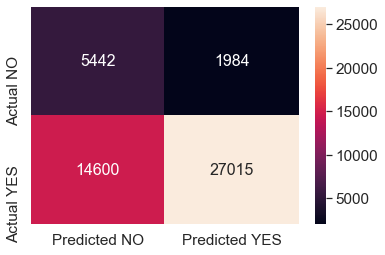

In [216]:
%%time
get_confusion_matrix(dt,X_train_tfidf,y_train)

CPU times: user 199 ms, sys: 21.8 ms, total: 220 ms
Wall time: 120 ms


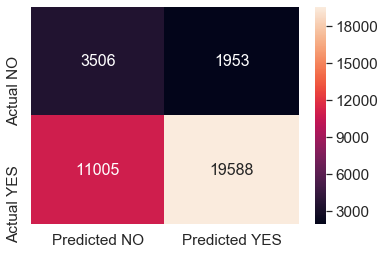

In [217]:
%%time
get_confusion_matrix(dt,X_test_tfidf,y_test)

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [218]:
# Collect all features name and create graph of features

features_tfidf = school_state_features + clean_categories_features + clean_subcategories_features + project_grade_category_features + teacher_prefix_features + clean_titles_tfidf_features + easy_tfidf_features + project_resource_summary_tfidf_features
features_tfidf.append('quantity')
features_tfidf.append('price')
features_tfidf.append('teacher_number_of_previously_posted_projects')

dt=DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_split=min_samples_split)
dt.fit(X_train_tfidf, y_train);

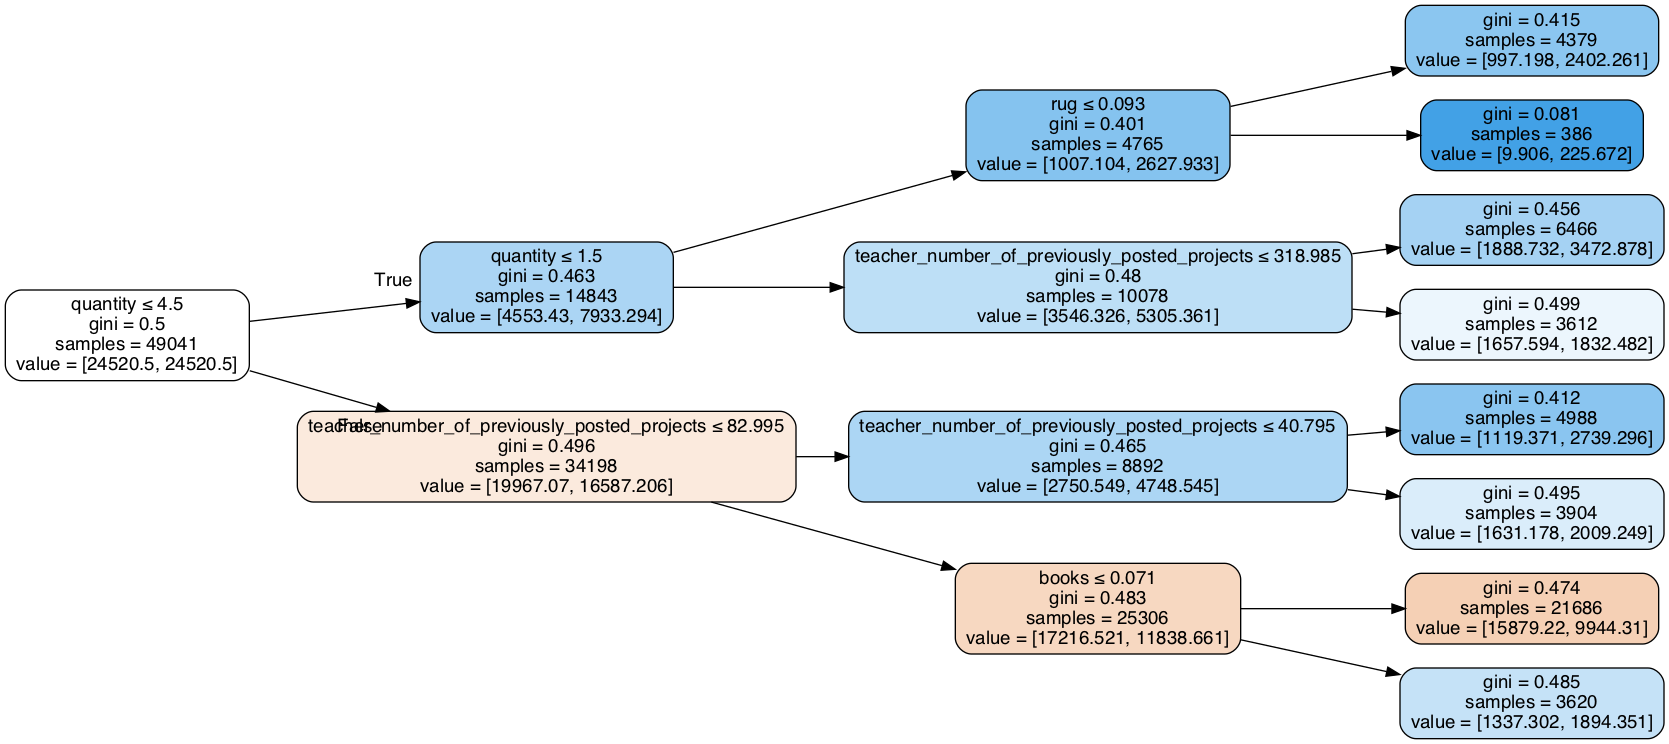

In [219]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=features_tfidf, filled=True, rounded=True, special_characters=True, rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [220]:
# Collect false positive data

predictions = collect_prediction(y_test_pred, te_thresholds, test_fpr, test_tpr)

# # train_fpr, train_tpr, tr_thresholds
fpr = collect_fpr(y_test, predictions)

essay = X_test_real['clean_essays'].to_frame()
essay = essay.reset_index()

price = X_test_real['price'].to_frame()
price = price.reset_index()

teacher_number_of_previously_posted_projects = X_test_real['teacher_number_of_previously_posted_projects'].to_frame()
teacher_number_of_previously_posted_projects = teacher_number_of_previously_posted_projects.reset_index()

flase_essays = []
false_price = []
false_teacher_number_of_previously_posted_projects = []
for i in fpr:
    flase_essays.append(essay.values[i][1:][0])
    false_price.append(price.values[i][1:][0])
    false_teacher_number_of_previously_posted_projects.append(teacher_number_of_previously_posted_projects.values[i][1:][0])
        
# print(len(flase_essays), len(false_price), len(false_teacher_number_of_previously_posted_projects))

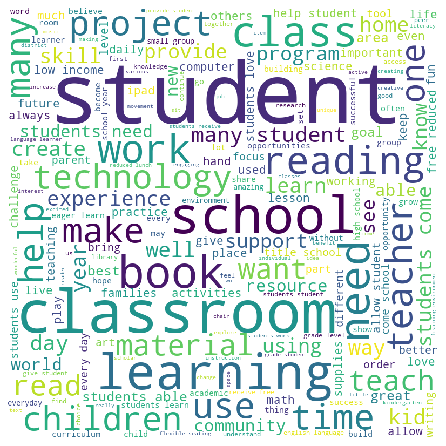

In [267]:
# create world cloud
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS)
for val in flase_essays:
    val = str(val)
    val = val.lower()
    tokens = val.split()
    for words in tokens:
        if(words == 'nan' or words == 'nannan'):
            continue
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

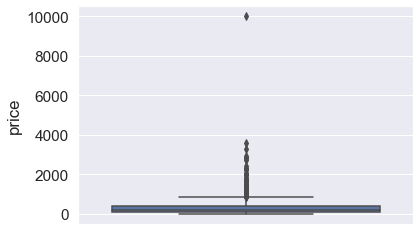

In [222]:
# Plot the box plot with the `price` of these `false positive data points`
df1 = pd.DataFrame({'price':false_price})
sns.boxplot(y='price', data=df1)

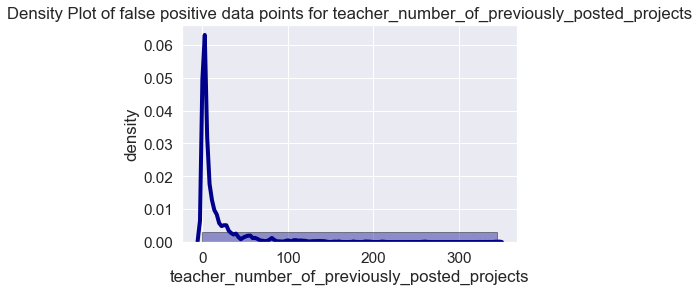

In [223]:
# Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
sns.distplot(false_teacher_number_of_previously_posted_projects, hist=True, kde=True, 
             bins=1, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title('Density Plot of false positive data points for teacher_number_of_previously_posted_projects') 
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('density')
plt.show()

# # Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
# plt.figure(figsize=(8,5))
# counts, bin_edges = np.histogram(false_teacher_number_of_previously_posted_projects, bins='auto', density=True)
# pdf = counts/sum(counts)
# cdf = np.cumsum(pdf)

# pdfP, = plt.plot(bin_edges[1:], pdf)
# cdfP, = plt.plot(bin_edges[1:], cdf)
# plt.legend([pdfP, cdfP], ["PDF", "CDF"]) 
# plt.xlabel('teacher_number_of_previously_posted_projects')
# plt.show()

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

<ul>
    <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li> 
</ul>

In [224]:
%%time
# I reduced data points to perform AVG W2V for 10K data points, For large data points it was not completed within 12hrs.
# Please write all the code with proper documentation
# Prepare data for BOW
X_train_avgw2v = hstack((X_train_school_state_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_project_grade_category_ohe, X_train_teacher_prefix_ohe, avg_w2v_vectors_text_train, avg_w2v_vectors_title_train, avg_w2v_vectors_project_resource_summary_train, X_train_quantity_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_price_norm)).tocsr()
X_cv_avgw2v = hstack((X_cv_school_state_ohe, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_project_grade_category_ohe, X_cv_clean_teacher_prefix_ohe, avg_w2v_vectors_text_cv, avg_w2v_vectors_title_cv, avg_w2v_vectors_project_resource_summary_cv, X_cv_quantity_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_price_norm)).tocsr()
X_test_avgw2v = hstack((X_test_school_state_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_project_grade_category_ohe, X_test_clean_teacher_prefix_ohe, avg_w2v_vectors_text_test, avg_w2v_vectors_title_test, avg_w2v_vectors_project_resource_summary_test, X_test_quantity_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()


print(X_train_avgw2v.shape)
print(X_cv_avgw2v.shape)
print(X_test_avgw2v.shape)


import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

dt = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split':[5, 10, 100, 500]}
clf=GridSearchCV(dt, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_avgw2v, y_train)

(49041, 1003)
(24155, 1003)
(36052, 1003)
CPU times: user 33.5 s, sys: 4.38 s, total: 37.9 s
Wall time: 3h 43min 34s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000],
                         'min_samples_split': [5, 10, 100, 500

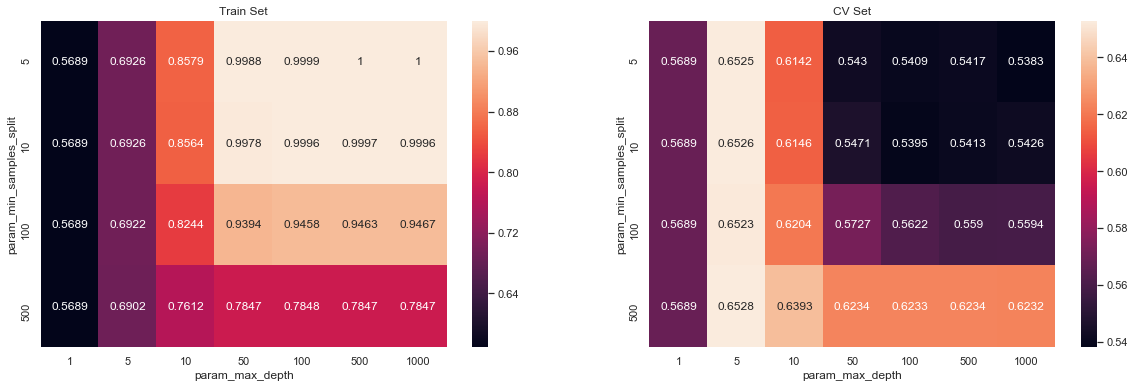

In [225]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [226]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_avgw2v, y_train))
print(clf.score(X_test_avgw2v, y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.6890382884364546
0.6581139199715997


In [268]:
max_depth = 5
min_samples_split = 500

In [274]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':[max_depth], 'min_samples_split':[min_samples_split]}
dt=GridSearchCV(DecisionTreeClassifier(class_weight='balanced', max_depth=max_depth, min_samples_split=min_samples_split), parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
dt.fit(X_train_avgw2v, y_train);

y_train_pred = clf.predict_proba(X_train_avgw2v)[:,1]  
y_test_pred = clf.predict_proba(X_test_avgw2v)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

CPU times: user 510 ms, sys: 135 ms, total: 645 ms
Wall time: 346 ms


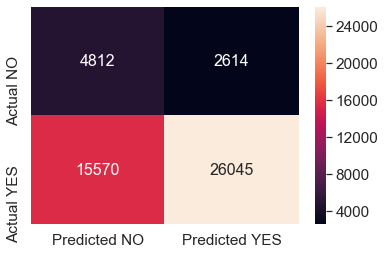

In [270]:
%%time
get_confusion_matrix(dt,X_train_avgw2v,y_train)

CPU times: user 330 ms, sys: 90.8 ms, total: 420 ms
Wall time: 268 ms


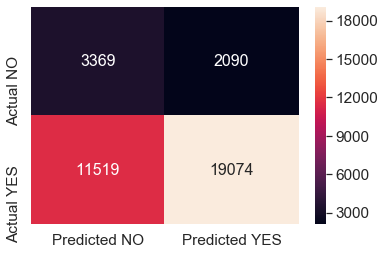

In [271]:
%%time
get_confusion_matrix(dt,X_test_avgw2v,y_test)

In [272]:
# Collect false positive data

predictions = collect_prediction(y_test_pred, te_thresholds, test_fpr, test_tpr)

# train_fpr, train_tpr, tr_thresholds
fpr = collect_fpr(y_test, predictions)

essay = X_test_real['clean_essays'].to_frame()
essay = essay.reset_index()

price = X_test_real['price'].to_frame()
price = price.reset_index()

teacher_number_of_previously_posted_projects = X_test_real['teacher_number_of_previously_posted_projects'].to_frame()
teacher_number_of_previously_posted_projects = teacher_number_of_previously_posted_projects.reset_index()

flase_essays = []
false_price = []
false_teacher_number_of_previously_posted_projects = []
for i in fpr:
    flase_essays.append(essay.values[i][1:][0])
    false_price.append(price.values[i][1:][0])
    false_teacher_number_of_previously_posted_projects.append(teacher_number_of_previously_posted_projects.values[i][1:][0])
        
# print(len(flase_essays), len(false_price), len(false_teacher_number_of_previously_posted_projects))

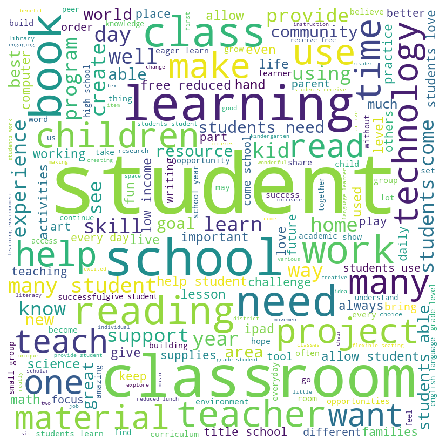

In [273]:
# create world cloud
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS)
for val in flase_essays:
    val = str(val)
    val = val.lower()
    tokens = val.split()
    for words in tokens:
        if(words == 'nan' or words == 'nannan'):
            continue
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

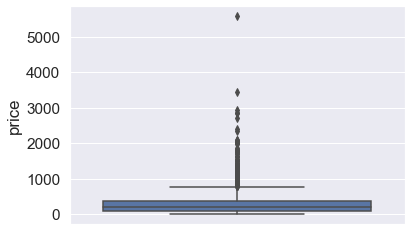

In [233]:
# Plot the box plot with the `price` of these `false positive data points`
df1 = pd.DataFrame({'price':false_price})
sns.boxplot(y='price', data=df1)

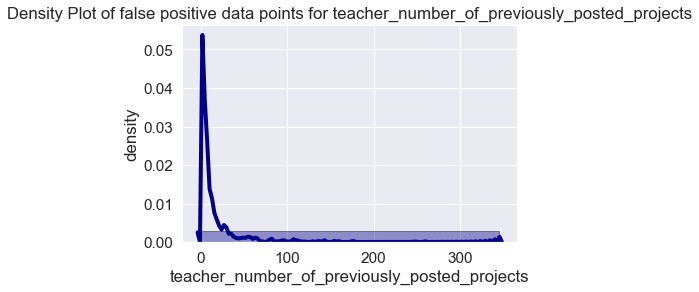

In [234]:
# Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
sns.distplot(false_teacher_number_of_previously_posted_projects, hist=True, kde=True, 
             bins=1, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title('Density Plot of false positive data points for teacher_number_of_previously_posted_projects') 
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('density')
plt.show()

# # Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
# plt.figure(figsize=(8,5))
# counts, bin_edges = np.histogram(false_teacher_number_of_previously_posted_projects, bins='auto', density=True)
# pdf = counts/sum(counts)
# cdf = np.cumsum(pdf)

# pdfP, = plt.plot(bin_edges[1:], pdf)
# cdfP, = plt.plot(bin_edges[1:], cdf)
# plt.legend([pdfP, cdfP], ["PDF", "CDF"]) 
# plt.xlabel('teacher_number_of_previously_posted_projects')
# plt.show()

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

<ul>
    <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li> 
</ul>

In [235]:
%%time
# I reduced data points to perform AVG W2V for 10K data points, For large data points it was not completed within 12hrs.
# Please write all the code with proper documentation
# Prepare data for BOW
X_train_tfidfw2v = hstack((X_train_school_state_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_project_grade_category_ohe, X_train_teacher_prefix_ohe, tfidf_w2v_vectors_text_train, tfidf_w2v_vectors_title_train, tfidf_w2v_vectors_project_resource_summary_train, X_train_quantity_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_price_norm)).tocsr()
X_cv_tfidfw2v = hstack((X_cv_school_state_ohe, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_project_grade_category_ohe, X_cv_clean_teacher_prefix_ohe, tfidf_w2v_vectors_text_cv, tfidf_w2v_vectors_title_cv, tfidf_w2v_vectors_project_resource_summary_cv, X_cv_quantity_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_price_norm)).tocsr()
X_test_tfidfw2v = hstack((X_test_school_state_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_project_grade_category_ohe, X_test_clean_teacher_prefix_ohe, tfidf_w2v_vectors_text_test, tfidf_w2v_vectors_title_test, tfidf_w2v_vectors_project_resource_summary_test, X_test_quantity_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()


print(X_train_tfidfw2v.shape)
print(X_cv_tfidfw2v.shape)
print(X_test_tfidfw2v.shape)


import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

dt = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split':[5, 10, 100, 500]}
clf=GridSearchCV(dt, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_tfidfw2v, y_train)

(49041, 1003)
(24155, 1003)
(36052, 1003)
CPU times: user 33 s, sys: 4.36 s, total: 37.3 s
Wall time: 8h 8min 20s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50, 100, 500, 1000],
                         'min_samples_split': [5, 10, 100, 500

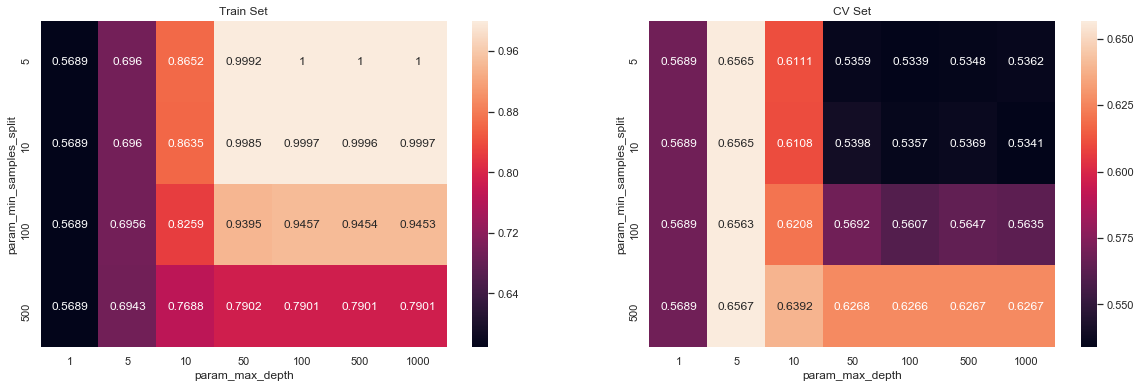

In [236]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [237]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_train_tfidfw2v, y_train))
print(clf.score(X_test_tfidfw2v, y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.68949661167243
0.6529840748709813


In [275]:
max_depth = 5
min_samples_split = 500

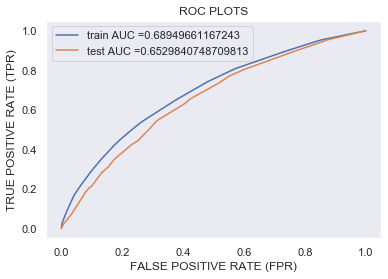

CPU times: user 29.6 s, sys: 1.07 s, total: 30.7 s
Wall time: 59.5 s


In [239]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':[max_depth], 'min_samples_split':[min_samples_split]}
dt=GridSearchCV(DecisionTreeClassifier(class_weight='balanced', max_depth=max_depth, min_samples_split=min_samples_split), parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
dt.fit(X_train_tfidfw2v, y_train);

y_train_pred = clf.predict_proba(X_train_tfidfw2v)[:,1]  
y_test_pred = clf.predict_proba(X_test_tfidfw2v)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

CPU times: user 515 ms, sys: 215 ms, total: 730 ms
Wall time: 506 ms


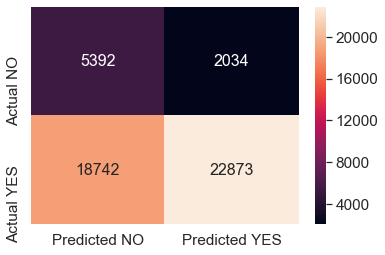

In [240]:
%%time
get_confusion_matrix(dt,X_train_tfidfw2v,y_train)

CPU times: user 320 ms, sys: 95.5 ms, total: 416 ms
Wall time: 243 ms


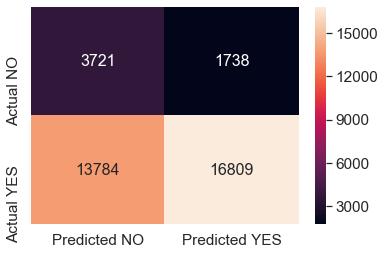

In [241]:
%%time
get_confusion_matrix(dt,X_test_tfidfw2v,y_test)

In [242]:
# Collect false positive data

predictions = collect_prediction(y_test_pred, te_thresholds, test_fpr, test_tpr)

# train_fpr, train_tpr, tr_thresholds
fpr = collect_fpr(y_test, predictions)

essay = X_test_real['clean_essays'].to_frame()
essay = essay.reset_index()

price = X_test_real['price'].to_frame()
price = price.reset_index()

teacher_number_of_previously_posted_projects = X_test_real['teacher_number_of_previously_posted_projects'].to_frame()
teacher_number_of_previously_posted_projects = teacher_number_of_previously_posted_projects.reset_index()

flase_essays = []
false_price = []
false_teacher_number_of_previously_posted_projects = []
for i in fpr:
    flase_essays.append(essay.values[i][1:][0])
    false_price.append(price.values[i][1:][0])
    false_teacher_number_of_previously_posted_projects.append(teacher_number_of_previously_posted_projects.values[i][1:][0])
        
# print(len(flase_essays), len(false_price), len(false_teacher_number_of_previously_posted_projects))

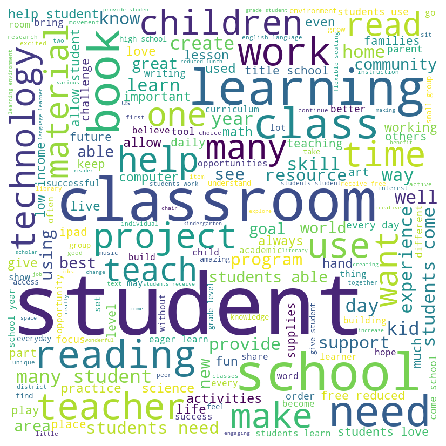

In [276]:
# create world cloud
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS)
for val in flase_essays:
    val = str(val)
    val = val.lower()
    tokens = val.split()
    for words in tokens:
        if(words == 'nan' or words == 'nannan'):
            continue
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

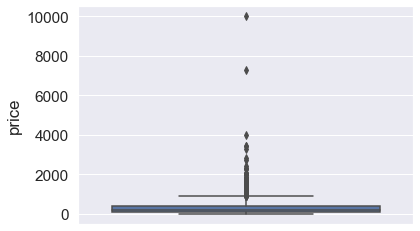

In [244]:
# Plot the box plot with the `price` of these `false positive data points`
df1 = pd.DataFrame({'price':false_price})
sns.boxplot(y='price', data=df1)

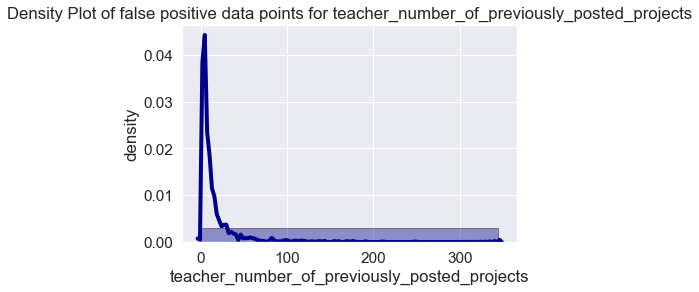

In [245]:
# Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
sns.distplot(false_teacher_number_of_previously_posted_projects, hist=True, kde=True, 
             bins=1, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title('Density Plot of false positive data points for teacher_number_of_previously_posted_projects') 
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('density')
plt.show()

# # Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
# plt.figure(figsize=(8,5))
# counts, bin_edges = np.histogram(false_teacher_number_of_previously_posted_projects, bins='auto', density=True)
# pdf = counts/sum(counts)
# cdf = np.cumsum(pdf)

# pdfP, = plt.plot(bin_edges[1:], pdf)
# cdfP, = plt.plot(bin_edges[1:], cdf)
# plt.legend([pdfP, cdfP], ["PDF", "CDF"]) 
# plt.xlabel('teacher_number_of_previously_posted_projects')
# plt.show()

<h2>2.5 Decision Tree with added Features `Set 5` </h2>

[Task-2]

Select 5k best features from features of Set 2 using`feature_importances_`, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3


In [246]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [247]:
%%time
# Please write all the code with proper documentation
# Prepare data for TFIDF
X_train_tfidf = hstack((X_train_school_state_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_project_grade_category_ohe, X_train_teacher_prefix_ohe, X_train_title_tfidf, X_train_essay_tfidf, X_train_project_resource_summary_tfidf, X_train_quantity_norm, X_train_teacher_number_of_previously_posted_projects_norm, X_train_price_norm)).tocsr()
X_cv_tfidf = hstack((X_cv_school_state_ohe, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_project_grade_category_ohe, X_cv_clean_teacher_prefix_ohe, X_cv_title_tfidf, X_cv_essay_tfidf, X_cv_project_resource_summary_tfidf, X_cv_quantity_norm, X_cv_teacher_number_of_previously_posted_projects_norm, X_cv_price_norm)).tocsr()
X_test_tfidf = hstack((X_test_school_state_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_project_grade_category_ohe, X_test_clean_teacher_prefix_ohe, X_test_title_tfidf, X_test_essay_tfidf, X_test_project_resource_summary_tfidf, X_test_quantity_norm, X_test_teacher_number_of_previously_posted_projects_norm, X_test_price_norm)).tocsr()

print(X_train_tfidf.shape)
print(X_cv_tfidf.shape)
print(X_test_tfidf.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train_tfidf, y_train)

print(sel.get_support())
print(len(sel.get_support()))

(49041, 17989)
(24155, 17989)
(36052, 17989)
[False  True  True ...  True  True  True]
17989
CPU times: user 1min 57s, sys: 941 ms, total: 1min 58s
Wall time: 1min 58s


In [248]:
#https://stackoverflow.com/questions/47111434/randomforestregressor-and-feature-importa nces-error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 

def selectKImportance(model, X, k=5):
    return X[:,model.best_estimator_.feature_importances_.argsort()[::-1][:k]]

In [249]:
dt = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split':[5, 10, 100, 500]}
clf=GridSearchCV(dt, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_train_tfidf, y_train)


X_set5_train = selectKImportance(clf, X_train_tfidf,5000)
X_set5_test = selectKImportance(clf, X_test_tfidf, 5000)
print(X_set5_train.shape)
print(X_set5_test.shape)

(49041, 5000)
(36052, 5000)


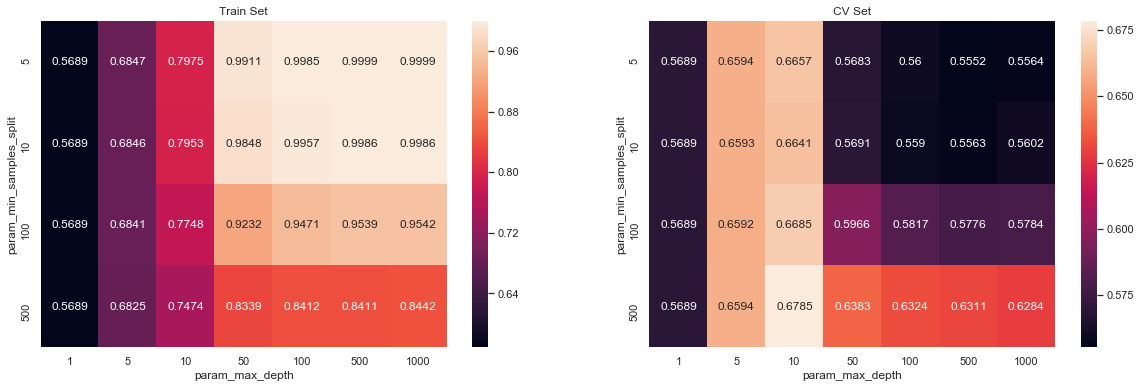

CPU times: user 4.7 s, sys: 125 ms, total: 4.83 s
Wall time: 5min 25s


In [250]:
%%time
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV

dt = DecisionTreeClassifier(class_weight='balanced')
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split':[5, 10, 100, 500]}
clf=GridSearchCV(dt, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(X_set5_train, y_train)

# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [251]:
# Print params
print(clf.best_estimator_)
print(clf.score(X_set5_train, y_train))
print(clf.score(X_set5_test, y_test))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.7454381245833981
0.6839138186310509


In [252]:
max_depth = 10
min_samples_split = 500

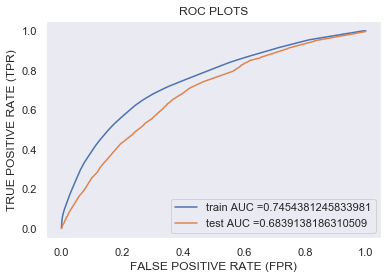

CPU times: user 4.43 s, sys: 63 ms, total: 4.49 s
Wall time: 7.02 s


In [253]:
%%time

# Create ROC Plot for Test Set
parameters = {'max_depth':[max_depth], 'min_samples_split':[min_samples_split]}
dt=GridSearchCV(DecisionTreeClassifier(class_weight='balanced', max_depth=max_depth, min_samples_split=min_samples_split), parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
dt.fit(X_set5_train, y_train);

y_train_pred = clf.predict_proba(X_set5_train)[:,1]  
y_test_pred = clf.predict_proba(X_set5_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE (FPR)")
plt.ylabel("TRUE POSITIVE RATE (TPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()

CPU times: user 165 ms, sys: 3.99 ms, total: 169 ms
Wall time: 86.9 ms


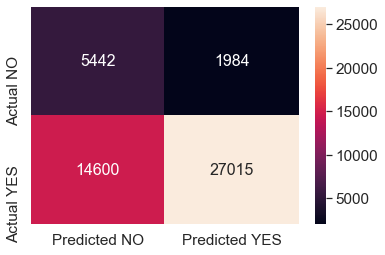

In [254]:
%%time
get_confusion_matrix(dt,X_set5_train,y_train)

CPU times: user 148 ms, sys: 6.48 ms, total: 154 ms
Wall time: 77.5 ms


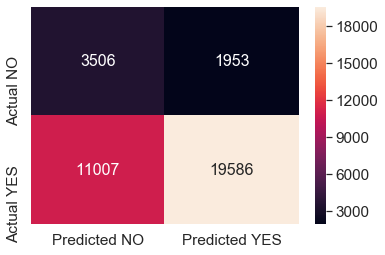

In [255]:
%%time
get_confusion_matrix(dt,X_set5_test,y_test)

In [256]:
# Collect false positive data

predictions = collect_prediction(y_test_pred, te_thresholds, test_fpr, test_tpr)

# train_fpr, train_tpr, tr_thresholds
fpr = collect_fpr(y_test, predictions)

essay = X_test_real['clean_essays'].to_frame()
essay = essay.reset_index()

price = X_test_real['price'].to_frame()
price = price.reset_index()

teacher_number_of_previously_posted_projects = X_test_real['teacher_number_of_previously_posted_projects'].to_frame()
teacher_number_of_previously_posted_projects = teacher_number_of_previously_posted_projects.reset_index()

flase_essays = []
false_price = []
false_teacher_number_of_previously_posted_projects = []
for i in fpr:
    flase_essays.append(essay.values[i][1:][0])
    false_price.append(price.values[i][1:][0])
    false_teacher_number_of_previously_posted_projects.append(teacher_number_of_previously_posted_projects.values[i][1:][0])
        
# print(len(flase_essays), len(false_price), len(false_teacher_number_of_previously_posted_projects))

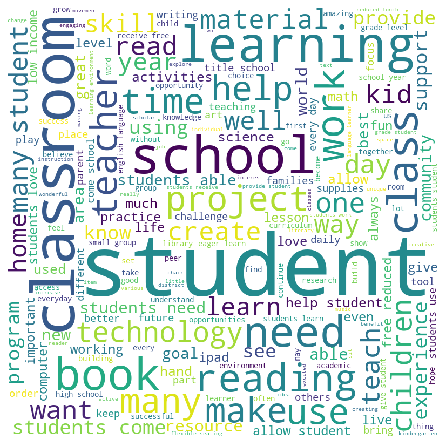

In [277]:
# create world cloud
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS)
for val in flase_essays:
    val = str(val)
    val = val.lower()
    tokens = val.split()
    for words in tokens:
        if(words == 'nan' or words == 'nannan'):
            continue
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

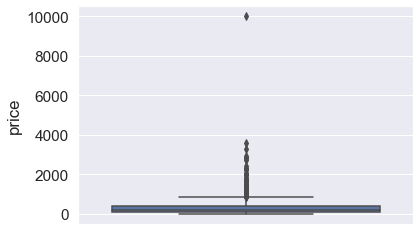

In [258]:
# Plot the box plot with the `price` of these `false positive data points`
df1 = pd.DataFrame({'price':false_price})
sns.boxplot(y='price', data=df1)

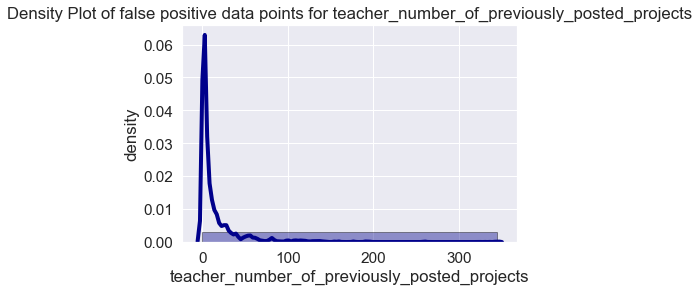

In [259]:
# Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
sns.distplot(false_teacher_number_of_previously_posted_projects, hist=True, kde=True, 
             bins=1, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title('Density Plot of false positive data points for teacher_number_of_previously_posted_projects') 
plt.xlabel('teacher_number_of_previously_posted_projects')
plt.ylabel('density')
plt.show()

# Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`
# plt.figure(figsize=(8,5))
# counts, bin_edges = np.histogram(false_teacher_number_of_previously_posted_projects, bins='auto', density=True)
# pdf = counts/sum(counts)
# cdf = np.cumsum(pdf)

# pdfP, = plt.plot(bin_edges[1:], pdf)
# cdfP, = plt.plot(bin_edges[1:], cdf)
# plt.legend([pdfP, cdfP], ["PDF", "CDF"]) 
# plt.xlabel('teacher_number_of_previously_posted_projects')
# plt.show()

<h1>3. Conclusions</h1>

In [279]:
# Please compare all your models using Prettytable library
# Please compare all your models using Prettytable library
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Max Depth", "Min Samples Split", "AUC"]
x.add_row(["Bag of Words", "Decision Tree", 10, 500, 0.68])
x.add_row(["TFIDF", "Decision Tree", 10, 500, 0.68])
x.add_row(["AVG W2V", "Decision Tree", 5, 500, 0.65])
x.add_row(["TFIDF W2V", "Decision Tree", 5, 500, 0.65])
x.add_row(["Top 5K Feature", "Decision Tree", 10, 500, 0.68,])


print(x)

+----------------+---------------+-----------+-------------------+------+
|   Vectorizer   |     Model     | Max Depth | Min Samples Split | AUC  |
+----------------+---------------+-----------+-------------------+------+
|  Bag of Words  | Decision Tree |     10    |        500        | 0.68 |
|     TFIDF      | Decision Tree |     10    |        500        | 0.68 |
|    AVG W2V     | Decision Tree |     5     |        500        | 0.65 |
|   TFIDF W2V    | Decision Tree |     5     |        500        | 0.65 |
| Top 5K Feature | Decision Tree |     10    |        500        | 0.68 |
+----------------+---------------+-----------+-------------------+------+
